# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup= BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
# Extract headers
headers = [header.get_text(strip=True) for header in table.find_all('th')]
print(headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

mars_data = []


# Loop through table rows (excluding the header if it's inside a <thead>)
for row in table.find_all('tr')[1:]:  
    cells = row.find_all('td')
    mars_data.append([cell.get_text(strip=True) for cell in cells])



In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=headers)


In [9]:
# Confirm DataFrame was created successfully

mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.
.
  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task


In [10]:
# Examine data type of each column

print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], errors='coerce')
mars_df['sol'] = pd.to_numeric(mars_df['sol'], errors='coerce').astype('Int32')
mars_df['ls'] = pd.to_numeric(mars_df['ls'], errors='coerce').astype('Int32')
mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce').astype('Int32')
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

# Confirm type changes were successful by examining data types again
data_types = mars_df.dtypes
print(data_types)


id                          object
terrestrial_date    datetime64[ns]
sol                          Int32
ls                           Int32
month                        Int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:

# 1. How many months are there on Mars?
unique_months = mars_df['month'].unique()

# Count the number of unique months
num_months = len(unique_months)
print(num_months)

12


In [13]:

# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_df['sol'].unique()

# Count the number of unique sols
num_sols = len(unique_sols)
print(num_sols)

1867


In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Print the results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


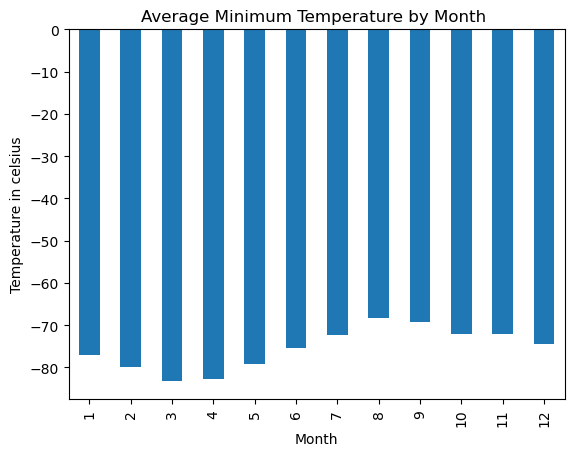

In [15]:
# Plot the average minimum temperature by month
mars_df.columns = mars_df.columns.str.strip()
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in celsius')
plt.title('Average Minimum Temperature by Month ')

# Show the plot
plt.show()

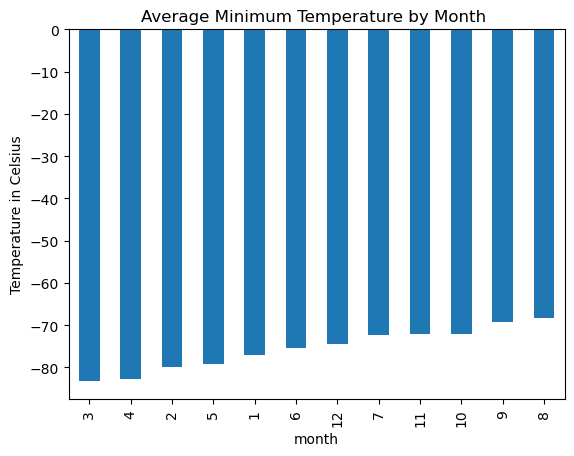

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mars_df.columns = mars_df.columns.str.strip()

# Sort the data by average minimum temperature
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
coldest_temp = sorted_avg_min_temp.min()

hottest_month = sorted_avg_min_temp.idxmax()
hottest_temp = sorted_avg_min_temp.max()

# Plot the average minimum temperature by month
sorted_avg_min_temp.plot(kind='bar')

# Set plot labels and title
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month ') 

plt.show()


In [17]:

# 4. What is the average pressure by month?

# Group by 'month' and calculate the average pressure
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


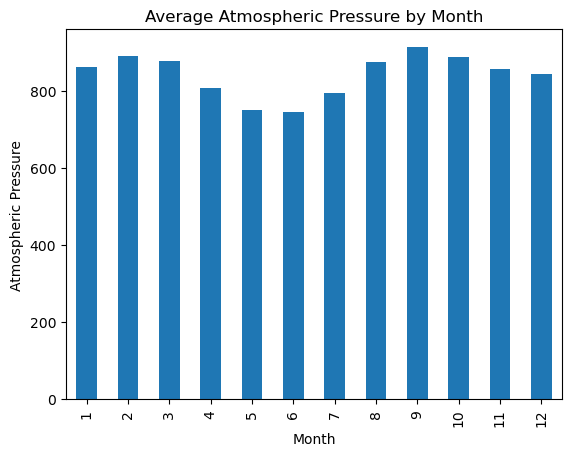

In [18]:
# Plot the average pressure by month

avg_pressure_by_month.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')

# Show the plot

plt.show()



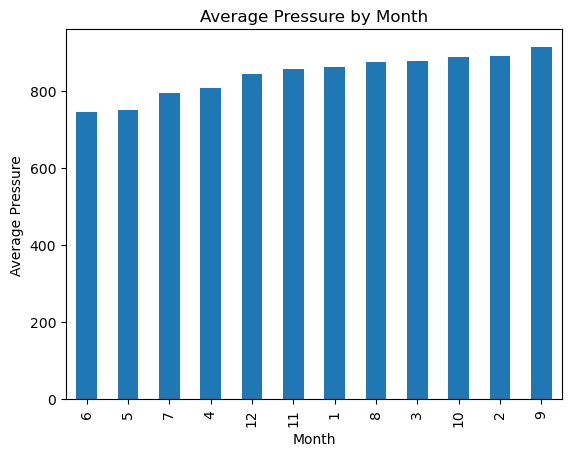

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average pressure data
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Identify the months with the lowest and highest pressure
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

lowest_pressure_value = sorted_avg_pressure.min()
highest_pressure_value = sorted_avg_pressure.max()


# Plot the sorted average pressure by month
sorted_avg_pressure.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')

# Show the plot
plt.show()

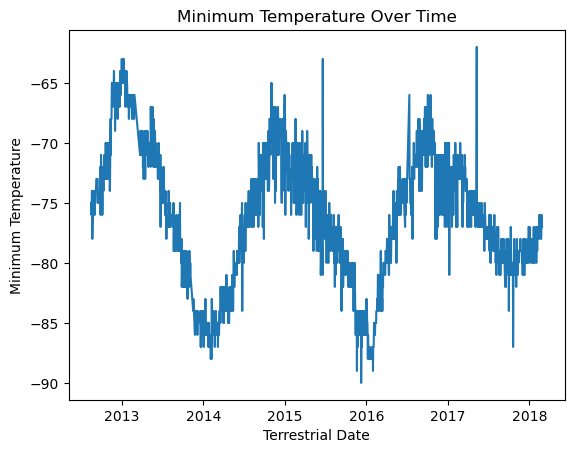

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


# Drop rows with NaN values in 'terrestrial_date' or 'min_temp'
mars_df = mars_df.dropna(subset=['terrestrial_date', 'min_temp'])

# Plot the daily minimum temperature
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'])

# Set plot labels and title
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')


# Show the plot
plt.show()

#### Minimum Temperature

1.The minimum temperature fluctuates between -60°C and -80°C across the year
2. The months with relatively higher minimum temperatures, around -60°C, are months 1 to 5 and months 10 to 12.



#### Atmospheric Pressure
1.The atmospheric pressure varies between 700 Pa and 900 Pa across the months.
2.The maximum pressure occurs in months 9 and 10, reaching close to 900 Pa.
3.The lowest pressure is observed around months 5 and 6, where it dips to just above 700 Pa.



#### Year Length
1.There is a clear cyclic pattern, likely reflecting seasonal temperature variations over the years.
2.Each year, the temperature goes through peaks and troughs, with lower temperatures reaching close to -90°C at the coldest points and higher minimum temperatures reaching around -65°C at the warmest points.
3.Some periods, particularly around 2016, show sharp dips below -80°C, while other periods see brief spikes where temperatures quickly rise to about -65°C before dropping again.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Specify the file path where you want to save the CSV file
file_path = 'output.csv'

# Write the DataFrame to a CSV file
mars_df.to_csv(file_path, index=False)


In [22]:
browser.quit()